<a href="https://colab.research.google.com/github/AdithyaSam-Ganj/-Blazars_Visibility_IceCube_Project_Adithya/blob/main/Wind_mill_power_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")  #using style ggplot

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px
import datetime as dt

# Importing a visualization library for visualising wind directions with speed
! pip install windrose

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/All Data Field For projects from 17th july /TexasTurbine.csv')
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [ ]:
df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%b %d %H:%M:%S.%f')

In [ ]:
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,Jan 01 00:00:00.000000,1766.64,9.926,128,1.000480,18.263
1,Jan 01 01:00:00.000000,1433.83,9.273,135,0.999790,18.363
2,Jan 01 02:00:00.000000,1167.23,8.660,142,0.999592,18.663
3,Jan 01 03:00:00.000000,1524.59,9.461,148,0.998309,18.763
4,Jan 01 04:00:00.000000,1384.28,9.184,150,0.998507,18.963


In [ ]:
df['Time stamp'] = df['Time stamp'].apply(lambda x: dt.datetime.strptime(x,'%b %d %H:%M:%S.%f') if type(x)==str else pd.NaT)
df.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
1,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
3,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
4,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Time stamp                     8760 non-null   datetime64[ns]
 1   System power generated | (kW)  8760 non-null   float64       
 2   Wind speed | (m/s)             8760 non-null   float64       
 3   Wind direction | (deg)         8760 non-null   int64         
 4   Pressure | (atm)               8760 non-null   float64       
 5   Air temperature | ('C)         8760 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB


In [ ]:
df.isnull().sum()

Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [ ]:
df.describe().round()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
count,8760.0,8760.0,8760.0,8760.0,8760.0
mean,964.0,7.0,147.0,1.0,22.0
std,879.0,3.0,85.0,0.0,5.0
min,0.0,0.0,0.0,1.0,3.0
25%,216.0,5.0,99.0,1.0,19.0
50%,694.0,7.0,135.0,1.0,23.0
75%,1562.0,10.0,169.0,1.0,26.0
max,3004.0,20.0,360.0,1.0,33.0


In [ ]:
df["Month"]=df["Time stamp"].dt.month

In [ ]:
df.columns

Index(['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)',
       'Month'],
      dtype='object')

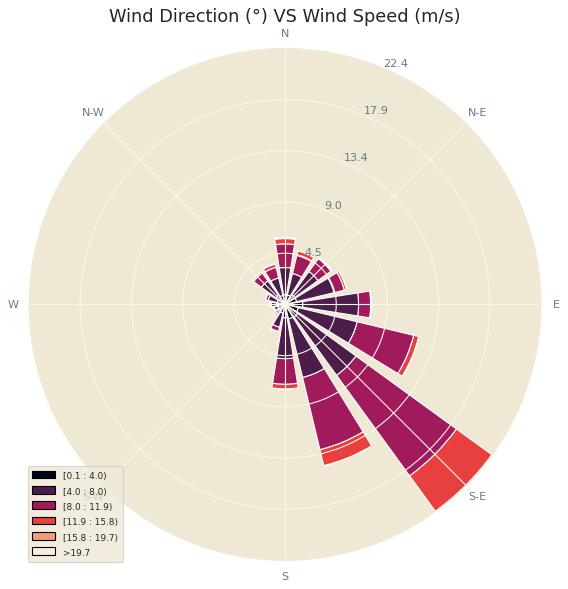

In [ ]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['Wind direction | (deg)'], df['Wind speed | (m/s)'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Direction (°) VS Wind Speed (m/s)")
plt.show()

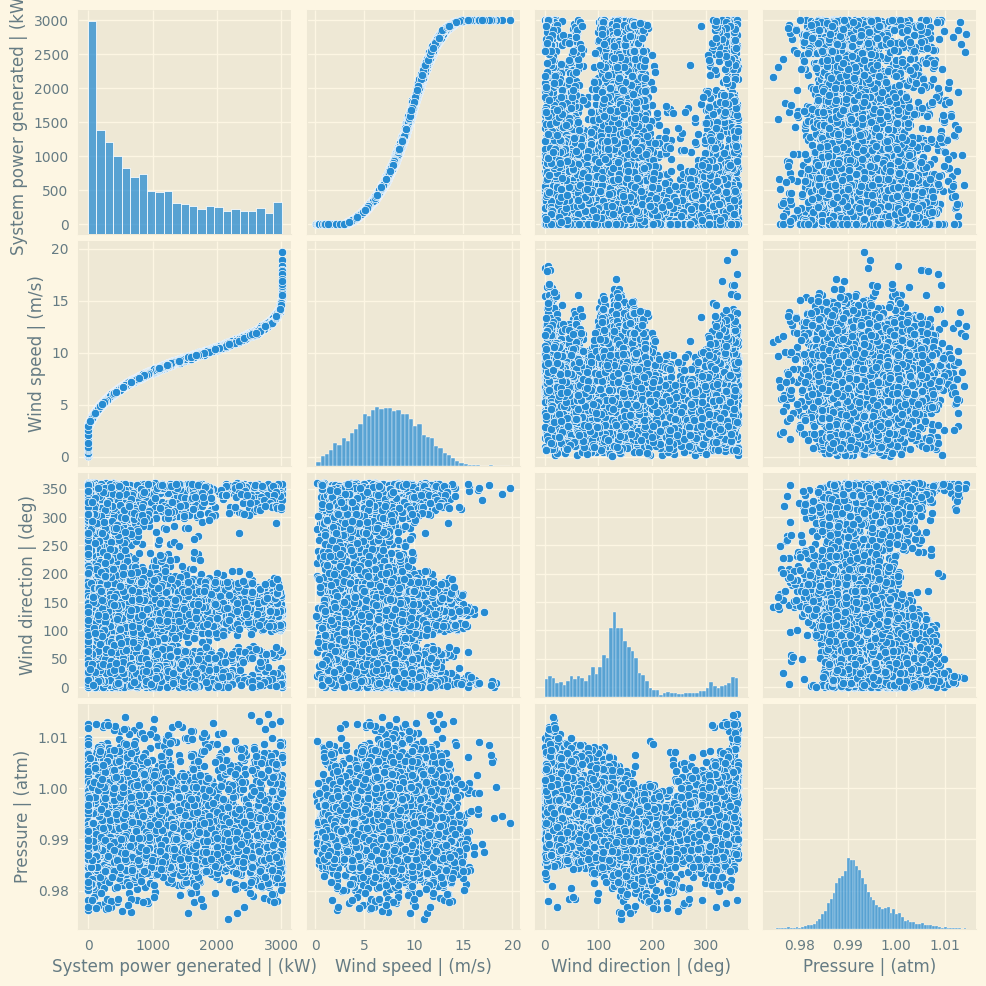

In [ ]:
sns.pairplot(df[['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)']])

<ipython-input-209-a84713be7404>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



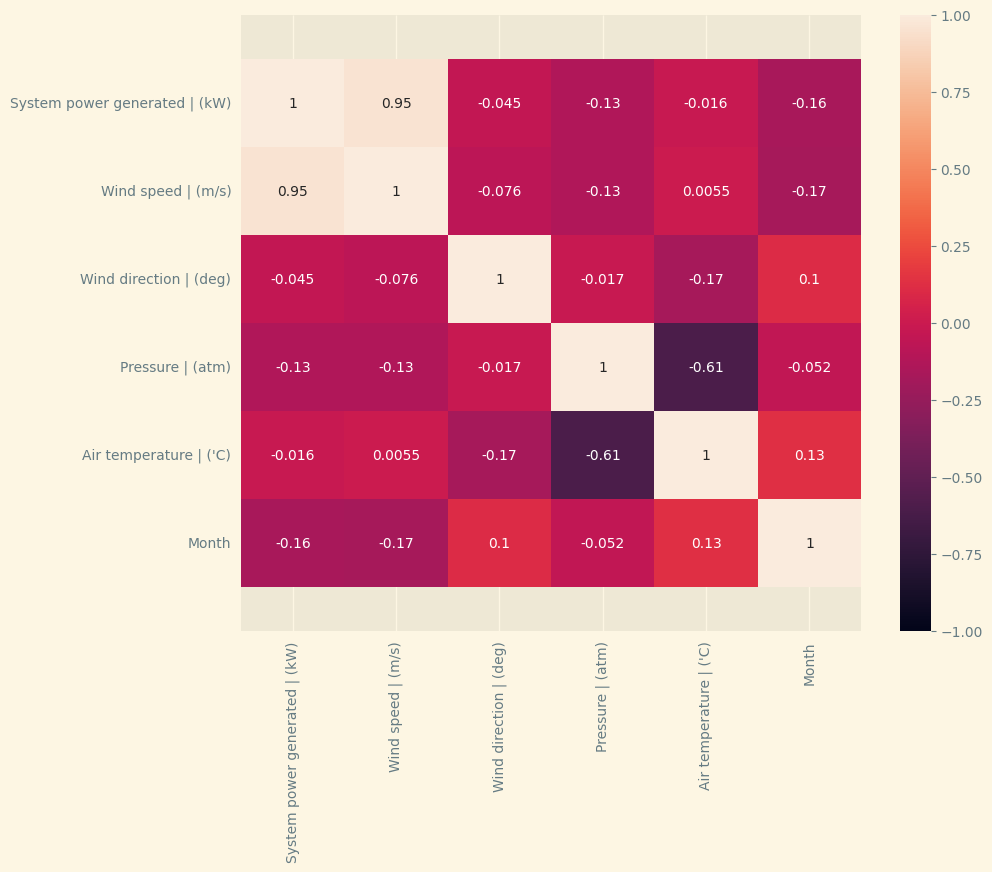

In [ ]:
#correlation between the values
corr = df.corr()
plt.figure(figsize=(10, 8))

ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<ipython-input-210-7779a2294f18>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-210-7779a2294f18>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-210-7779a2294f18>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-210-7779a2294f18>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-210-7779a2294f18>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




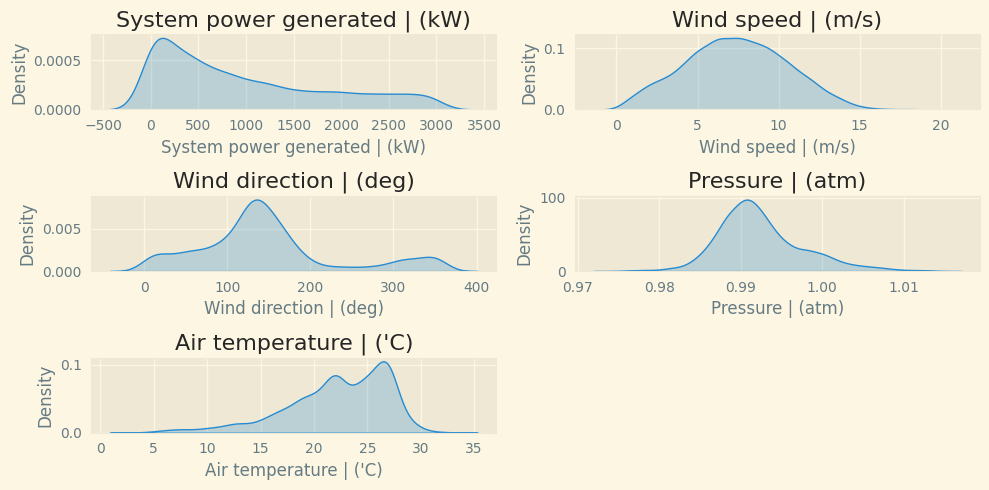

In [ ]:
#plotting the data distribution
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(df.iloc[:,i+1], shade=True)
    plt.title(df.columns[i+1])
plt.tight_layout()
plt.show()

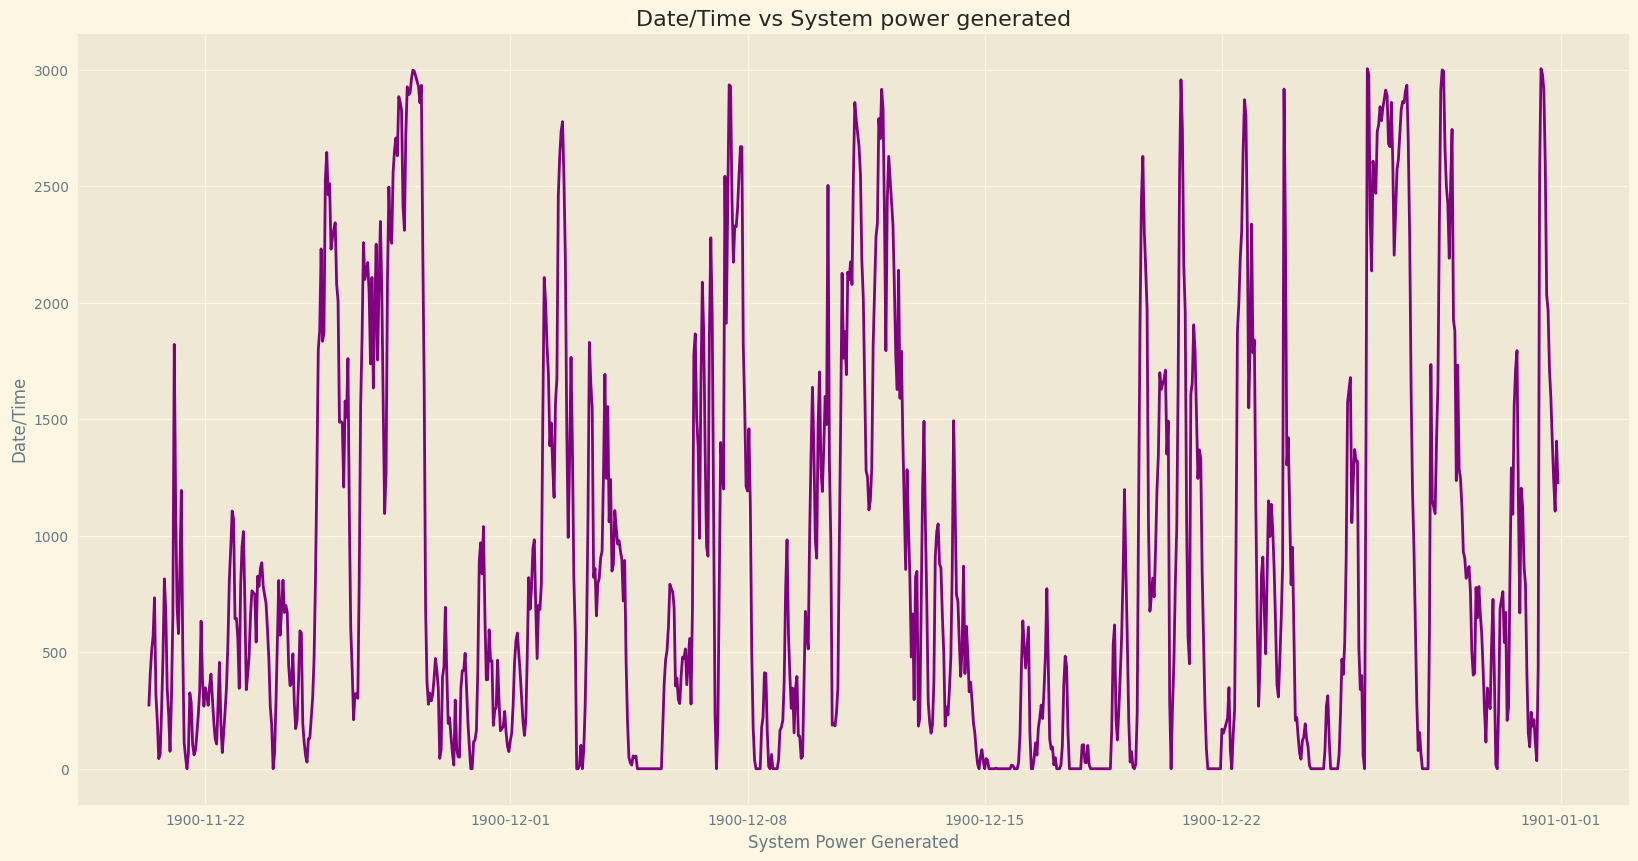

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

# Add x-axis and y-axis
ax.plot(df['Time stamp'][-1000:-1],
        df['System power generated | (kW)'][-1000:-1],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="System Power Generated",
       ylabel="Date/Time",
       title="Date/Time vs System power generated")

plt.show()

# LSTM Model


In [ ]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np
import pandas as pd

<ipython-input-212-66b0dd25839b>:5: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/All Data Field For projects from 17th july /TexasTurbine.csv')

df['Time stamp'] = pd.to_datetime(df['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%b %d %H:%M:%S.%f')
df['Time stamp'] = df['Time stamp'].apply(lambda x: dt.datetime.strptime(x,'%b %d %H:%M:%S.%f') if type(x)==str else pd.NaT)

df["Month"] = df["Time stamp"].dt.month
df = df.set_index(df["Time stamp"])

In [ ]:
df

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),Month
Time stamp,,,,,,,
1900-01-01 00:00:00,1900-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1
1900-01-01 01:00:00,1900-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1
1900-01-01 02:00:00,1900-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1
1900-01-01 03:00:00,1900-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1
1900-01-01 04:00:00,1900-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1
...,...,...,...,...,...,...,...
1900-12-31 19:00:00,1900-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,12
1900-12-31 20:00:00,1900-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,12
1900-12-31 21:00:00,1900-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,12


In [ ]:
scaler=StandardScaler()
scaler = scaler.fit(df[['System power generated | (kW)']])

train_set = df[:8000]
test_set = df[8000:]

train_set['System power generated | (kW)'] = scaler.transform(train_set[['System power generated | (kW)']])
test_set['System power generated | (kW)'] = scaler.transform(test_set[['System power generated | (kW)']])

last_n = 24

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []
    for i in range(len(x)-last_n):
        x_values.append(x.iloc[i:(i+last_n)].values)
        y_values.append(y.iloc[i+last_n])
    return np.array(x_values), np.array(y_values)

x_train, y_train = to_sequences(train_set[['System power generated | (kW)']], train_set['System power generated | (kW)'], last_n)
x_test, y_test = to_sequences(test_set[['System power generated | (kW)']], test_set['System power generated | (kW)'], last_n)

<ipython-input-245-fe784b80a283>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-245-fe784b80a283>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model=Sequential()
model.add(LSTM(256,return_sequences=True,input_shape=(last_n,1)))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 24, 256)           264192    
                                                                 
 lstm_31 (LSTM)              (None, 24, 128)           197120    
                                                                 
 lstm_32 (LSTM)              (None, 64)                49408     
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 510,785
Trainable params: 510,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
225/225 [==============================] - 12s 25ms/step - loss: 0.2671 - val_loss: 0.1223
Epoch 2/25
225/225 [==============================] - 2s 9ms/step - loss: 0.1

In [ ]:
train_predict = model.predict(x_train)
test_predict  = model.predict(x_test)

predict_train = scaler.inverse_transform(train_predict)
predict_test  = scaler.inverse_transform(test_predict)

#%%Visualization of predictions(test_set)
previous_days = last_n

testPredictPlot = np.empty_like(df['System power generated | (kW)'])
testPredictPlot[:] = np.nan
testPredictPlot = testPredictPlot.reshape(-1,1)
testPredictPlot[len(train_predict)+(previous_days*2):len(df), :] = predict_test

df_tpp = pd.DataFrame(data=testPredictPlot, columns=['predicted'])
df_tpp['start'] = df.index
df_tpp['start'] = pd.to_datetime(df_tpp['start'])
df_tpp = df_tpp.set_index("start")

df_tpp['ground_truth'] = df[["System power generated | (kW)"]]

23/23 [==============================] - 0s 4ms/step


In [ ]:
df_tpp['ground_truth'] = df[["System power generated | (kW)"]]

In [ ]:
df[["System power generated | (kW)"]]

,System power generated | (kW)
Time stamp,
1900-01-01 00:00:00,1766.64
1900-01-01 01:00:00,1433.83
1900-01-01 02:00:00,1167.23
1900-01-01 03:00:00,1524.59
1900-01-01 04:00:00,1384.28
...,...
1900-12-31 19:00:00,1234.70
1900-12-31 20:00:00,1105.37
1900-12-31 21:00:00,1405.71


In [ ]:
df_tpp

,predicted,ground_truth
start,,
1900-01-01 00:00:00,NaN,1766.64
1900-01-01 01:00:00,NaN,1433.83
1900-01-01 02:00:00,NaN,1167.23
1900-01-01 03:00:00,NaN,1524.59
1900-01-01 04:00:00,NaN,1384.28
...,...,...
1900-12-31 19:00:00,1210.533569,1234.70
1900-12-31 20:00:00,1106.728882,1105.37
1900-12-31 21:00:00,1020.691467,1405.71


In [ ]:
df_tpp

,predicted,start,ground_truth
0,NaN,1900-01-01 00:00:00,0.913107
1,NaN,1900-01-01 01:00:00,0.534272
2,NaN,1900-01-01 02:00:00,0.230803
3,NaN,1900-01-01 03:00:00,0.637583
4,NaN,1900-01-01 04:00:00,0.477869
...,...,...,...
8755,1210.533569,1900-12-31 19:00:00,0.307603
8756,1106.728882,1900-12-31 20:00:00,0.160388
8757,1020.691467,1900-12-31 21:00:00,0.502263
8758,1348.510864,1900-12-31 22:00:00,0.292419


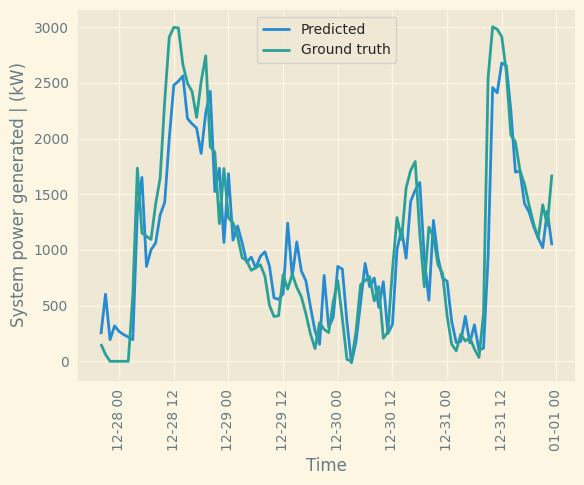

In [ ]:
plt.plot(df_tpp['predicted'].tail(100),label = 'Predicted')
plt.plot(df_tpp['ground_truth'].tail(100),label = 'Ground truth')
plt.xlabel('Time')
plt.xticks(rotation = 90)
plt.ylabel('System power generated | (kW)')
plt.legend()
plt.show()
